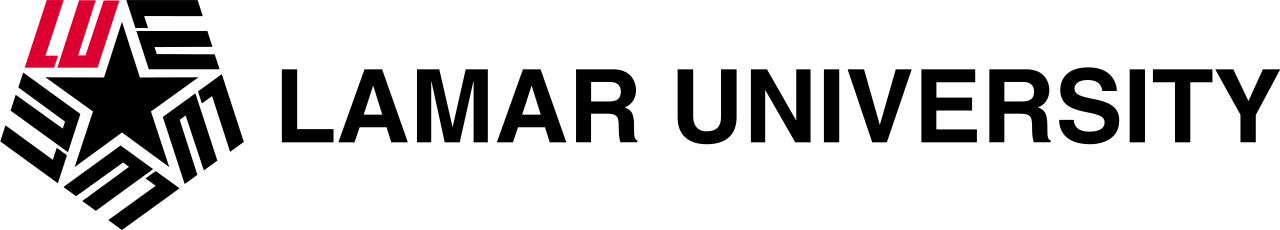

<h2>Problem Statement</h2>
<h3>Roads and Transportation Network in SouthEast Texas</h3>

<h3>Nimesh Devrajbhai Dhameliya</h3>

<h3>Avinash Sai Anumolu</h3>

<h3>Madhu Gojjala</h3>

<h3>Guided by: Dr. Venkatesh Uddameri</h3>

In [1]:
import pandas as pd   #import library
import numpy as np
import geopandas as pgd
import os
import sqlite3

<h2>County Data</h2>

In [2]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\County')   #set working directory
County = pgd.read_file('County.shp')    #import file
#County.plot(figsize=(5,5))   #plot of county data
#County.crs   #projection of County data

In [3]:
#study area
SE = ['Newton', 'Orange', 'Jefferson', 'Chambers', 'Galveston', 'Montgomery', 'Walker', 'Jasper', 'Polk', 'Tyler', 'Liberty', 'Hardin', 'San Jacinto', 'Harris']

In [4]:
Result = []   #Filter Study area from Data
for n in SE:
    SE_C = County.loc[County['CNTY_NM'] == n]
    Result.append(SE_C)
#print(Result)

In [5]:
SE_County = pd.concat(Result)     #merge data in one dataframe
SE_County = SE_County[['DPS_CNTY_N','FIPS_ST_CN','CNTY_NM','geometry']]    #filter needy data columns
SE_County

,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM,geometry
60,176,48351,Newton,"POLYGON ((-93.54377 31.18340, -93.54358 31.183..."
26,181,48361,Orange,"POLYGON ((-93.70790 30.24439, -93.70785 30.244..."
24,123,48245,Jefferson,"POLYGON ((-94.18898 30.18406, -94.18887 30.183..."
12,36,48071,Chambers,"POLYGON ((-94.35798 29.88355, -94.35785 29.878..."
5,84,48167,Galveston,"POLYGON ((-94.37217 29.59623, -94.37205 29.596..."
36,170,48339,Montgomery,"POLYGON ((-95.82953 30.63003, -95.82151 30.625..."
52,236,48471,Walker,"POLYGON ((-95.43469 31.05801, -95.43461 31.049..."
58,121,48241,Jasper,"POLYGON ((-93.90442 31.12737, -93.90437 31.127..."
57,187,48373,Polk,"POLYGON ((-94.84253 31.14622, -94.84238 31.145..."
56,229,48457,Tyler,"POLYGON ((-94.54745 31.05905, -94.54723 31.058..."


In [6]:
#SE_County.plot(figsize=(10, 10))    # plot of study area
#SE_County.crs      # projection


In [7]:
SE_County.to_csv('SouthEastTexasCounty.csv')    #save to csv file
SE_County.to_file('SouthEastTexasCounty.shp')    #save to shapefile
##county = pd.read_csv('SouthEastTexasCounty.csv')
##county

In [8]:
import branca as bc
import folium
SE_County.explore(cmap='set1')   #explore study area on world map

<h2>Roadways Data</h2>

In [13]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data')   #set working directory
Roadways = pgd.read_file('TxDOT_Roadways.shp')      #import file

#filter needy data columns
Roadways = Roadways[['RTE_GRID','RTE_PRFX','RTE_NBR','RDBD_TYPE','RDWAY_STAT','FUNC_SYS','MAP_LBL','geometry']]
Roadways   #result

,RTE_GRID,RTE_PRFX,RTE_NBR,RDBD_TYPE,RDWAY_STAT,FUNC_SYS,MAP_LBL,geometry
0,159903,BI,27,Single Roadbed,Open to Traffic,3,27U,"LINESTRING (-101.70680 34.18452, -101.70673 34..."
1,154409,SL,289,Right Frontage,Open to Traffic,5,289,"LINESTRING (-101.89005 33.61646, -101.88917 33..."
2,154770,US,70,Right Frontage,Open to Traffic,5,70,"LINESTRING (-99.15333 34.13136, -99.15298 34.1..."
3,154779,US,83,Right Frontage,Open to Traffic,5,83,"LINESTRING (-99.79316 32.56705, -99.79209 32.5..."
4,175660,FM,56,Single Roadbed,Open to Traffic,5,56,"LINESTRING (-97.75225 32.22500, -97.74844 32.2..."
...,...,...,...,...,...,...,...,...
553305,170318,CS,269876,Single Roadbed,Unknown,5,CRAWFORD RD,None
553306,104929,CR,51,Single Roadbed,Unknown,7,COUNTY ROAD 1301,"LINESTRING (-98.31841 31.12792, -98.31843 31.1..."
553307,154311,SH,99,Left Frontage,Unknown,0,None,"LINESTRING (-94.87055 29.83349, -94.87033 29.8..."
553308,154311,SH,99,Grade Separated Connector,Unknown,0,99,"LINESTRING (-95.05523 30.13271, -95.05504 30.1..."


In [10]:
#Roadways.plot()   #plot
#Roadways.crs     #projection system

In [14]:
SE_Roadways = Roadways.clip(SE_County)     # clip data on study area to extract data of 14 county
#SE_Roadways.plot()         # plot the data

In [16]:
roadways = pgd.sjoin(SE_Roadways,SE_County,how='inner',predicate='intersects')    #use spatial joint to combine geospatial data
roadways

,RTE_GRID,RTE_PRFX,RTE_NBR,RDBD_TYPE,RDWAY_STAT,FUNC_SYS,MAP_LBL,geometry,index_right,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM
483732,154765,US,59,Single Roadbed,Open to Traffic,3,59,"LINESTRING (-94.81007 31.13293, -94.81048 31.1...",46,204,48407,San Jacinto
138000,75412,CR,3624,Single Roadbed,Open to Traffic,7,NEWPORT WAY,"LINESTRING (-95.25429 30.86182, -95.25378 30.8...",46,204,48407,San Jacinto
138049,75393,CR,3623,Single Roadbed,Open to Traffic,7,MONACO WAY,"LINESTRING (-95.25446 30.86303, -95.25425 30.8...",46,204,48407,San Jacinto
164724,75331,CR,3620,Single Roadbed,Open to Traffic,7,ADMIRALTY WAY,"LINESTRING (-95.25438 30.86128, -95.25425 30.8...",46,204,48407,San Jacinto
137637,75374,CR,3622,Single Roadbed,Open to Traffic,7,NAPLES WAY,"LINESTRING (-95.25542 30.86450, -95.25459 30.8...",46,204,48407,San Jacinto
...,...,...,...,...,...,...,...,...,...,...,...,...
202196,199935,CS,1024414,Single Roadbed,Open to Traffic,7,HARBOUR LN,"LINESTRING (-94.87086 29.67943, -94.86981 29.6...",12,36,48071,Chambers
202601,199938,CS,1024417,Single Roadbed,Open to Traffic,7,HURST RD,"LINESTRING (-94.87024 29.68200, -94.86974 29.6...",12,36,48071,Chambers
178633,157089,FD,702299,Single Roadbed,Proposed,7,ALICE JACKSON WHITE ACCESS RD,"LINESTRING (-94.56789 29.57350, -94.56786 29.5...",12,36,48071,Chambers
177783,157090,FD,702300,Single Roadbed,Proposed,7,ALICE JACKSON WHITE ACCESS RD,"LINESTRING (-94.57089 29.58344, -94.57082 29.5...",12,36,48071,Chambers


In [17]:
roadways.to_csv('SouthEastTexasRoads.csv')   #save to csv
roadways.to_file('SouthEastTexasRoads.shp')    #save to shapefile
#road = pd.read_csv('SouthEastTexasRoads.csv',low_memory=False)
#road

C:\Users\nimes\AppData\Local\Temp\ipykernel_9272\942076957.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  roadways.to_file('SouthEastTexasRoads.shp')


<h2>Airports Data</h2>

In [9]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Shape')     #set working directory
Airpoints = pgd.read_file('Trans_AirportPoint.shp')    #import file
Airpoints.crs     # projection system   NAD83

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [10]:
Airports = Airpoints.to_crs(epsg=4326)    #change projection to WGS84 for clip the data 
#Airports.plot()
Airports.crs
Airports = Airports[['name','ftype','fcode','faa_airpor','gnis_id','geometry']]   # filter data

In [11]:
Airports_SE = Airports.clip(SE_County)    # clip the data on county to extract data
#Airports_SE
Airports_SE.plot()

,name,ftype,fcode,faa_airpor,gnis_id,geometry
2687,Wildwood Airport,200,20000,XA91,2676603,POINT (-94.43822 30.53849)
2610,12/30,201,20100,TE38,None,POINT (-94.90953 30.59242)
2609,Loghouse /STOL/ Airport,200,20000,TE38,1386741,POINT (-94.91193 30.59369)
2662,Kirbyville Airport,200,20000,T12,1387024,POINT (-93.91356 30.64396)
2683,04/22,201,20100,T12,None,POINT (-93.91412 30.64533)
...,...,...,...,...,...,...
990,Creasy Airport,200,20000,5TA5,1387508,POINT (-95.11324 29.33388)
1021,12/30,201,20100,5TA5,None,POINT (-95.11532 29.33595)
979,Freyer Field,200,20000,37TE,1386821,POINT (-95.00949 29.35916)
1006,16/34,201,20100,37TE,None,POINT (-95.00903 29.36171)


In [16]:
airports = pgd.sjoin(Airports_SE,SE_County,how='inner',predicate='intersects')   #spatial joint of 2 table
airports

,name,ftype,fcode,faa_airpor,gnis_id,geometry,index_right,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM
2687,Wildwood Airport,200,20000,XA91,2676603,POINT (-94.43822 30.53849),56,229,48457,Tyler
2675,Tyler County Airport,200,20000,09R,1387769,POINT (-94.45967 30.77417),56,229,48457,Tyler
2656,16/34,201,20100,09R,None,POINT (-94.45880 30.77500),56,229,48457,Tyler
2635,Tyler County Hospital Heliport,200,20001,TE19,None,POINT (-94.42851 30.77621),56,229,48457,Tyler
2657,18/36,201,20100,XA91,None,POINT (-94.43802 30.53449),56,229,48457,Tyler
...,...,...,...,...,...,...,...,...,...,...
2554,Huntsville Memorial Hospital Heliport,200,20001,TE03,None,POINT (-95.55795 30.69821),52,236,48471,Walker
2575,Huntsville Municipal Airport,200,20000,UTS,1383448,POINT (-95.58662 30.74350),52,236,48471,Walker
2570,18/36,201,20100,UTS,None,POINT (-95.58715 30.74688),52,236,48471,Walker
2612,Raven's Nest Airport,200,20000,57TS,2770208,POINT (-95.54217 30.79500),52,236,48471,Walker


In [25]:
airports.to_file('SouthEastTexasAirports.shp')    # save to csv
airports.to_csv('SouthEastTexasAirports.csv')    # save to shape file
#airport = pd.read_csv('SouthEastTexasAirports.csv')
#airport

C:\Users\nimes\AppData\Local\Temp\ipykernel_9272\884639525.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  airports.to_file('SouthEastTexasAirports.shp')


<h2>Railway Data</h2>

In [27]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Texas_Railroads')   # set working diroctory
Railroads = pgd.read_file('Railroad.shp')    # import shapefile 
#Railroads.crs
Railroads = Railroads[['RR_ABRVN','RR_COMPANY','RR_STATUS','RR_NBR','geometry']]  # filter data
Railroads

,RR_ABRVN,RR_COMPANY,RR_STATUS,RR_NBR,geometry
0,UP,Union Pacific Railroad Company,Active,66.0,"LINESTRING (-98.22973 29.65261, -98.23011 29.6..."
1,UP,Union Pacific Railroad Company,Active,66.0,"LINESTRING (-98.25912 29.63428, -98.25899 29.6..."
2,UP,Union Pacific Railroad Company,Active,66.0,"LINESTRING (-95.10362 29.52899, -95.10576 29.5..."
3,UP,Union Pacific Railroad Company,Active,66.0,"LINESTRING (-95.10667 29.52595, -95.10648 29.5..."
4,UP,Union Pacific Railroad Company,Active,66.0,"LINESTRING (-95.41294 30.07088, -95.41272 30.0..."
...,...,...,...,...,...
13137,KCS,Kansas City Southern Railway,Active,79.0,"LINESTRING (-94.96826 32.99722, -94.96838 32.9..."
13138,None,None,Pulled,NaN,"LINESTRING (-95.56444 29.71757, -95.56466 29.7..."
13139,None,None,Pulled,NaN,"LINESTRING (-97.96543 26.29730, -97.95951 26.2..."
13140,UP,Union Pacific Railroad Company,Active,66.0,"LINESTRING (-95.28194 32.36304, -95.28217 32.3..."


In [28]:
SE_Railroads = Railroads.clip(SE_County)
#SE_Railroads.plot()    # clip data of 14 county

In [30]:
railways = pgd.sjoin(SE_Railroads,SE_County,how='inner',predicate='intersects')   #spatial joint
railways

,RR_ABRVN,RR_COMPANY,RR_STATUS,RR_NBR,geometry,index_right,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM
2879,BNSF,BNSF Railway Company,Active,15.0,"LINESTRING (-93.95135 30.45266, -93.95098 30.4...",58,121,48241,Jasper
2880,BNSF,BNSF Railway Company,Active,15.0,"LINESTRING (-93.95080 30.45305, -93.95030 30.4...",58,121,48241,Jasper
2878,TIBR,Timberrock Railroad Company,Active,1.0,"LINESTRING (-93.94906 30.46487, -93.94909 30.4...",58,121,48241,Jasper
2877,BNSF,BNSF Railway Company,Active,15.0,"LINESTRING (-93.92639 30.53590, -93.92664 30.5...",58,121,48241,Jasper
2876,BNSF,BNSF Railway Company,Active,15.0,"LINESTRING (-93.90624 30.59898, -93.90634 30.5...",58,121,48241,Jasper
...,...,...,...,...,...,...,...,...,...
4328,None,None,Unknown,NaN,"LINESTRING (-95.50102 30.70567, -95.50145 30.7...",52,236,48471,Walker
4139,None,None,Inactive/Abandoned,NaN,"LINESTRING (-95.54194 30.71672, -95.54174 30.7...",52,236,48471,Walker
4364,None,None,Pulled,NaN,"LINESTRING (-95.54658 30.71847, -95.54561 30.7...",52,236,48471,Walker
5881,None,None,Inactive/Abandoned,NaN,"LINESTRING (-95.54633 30.72108, -95.54616 30.7...",52,236,48471,Walker


In [31]:
railways.to_csv('SouthEastTexasRailways.csv')   #save to csv
railways.to_file('SouthEastTexasRailways.shp')    #save to shapefile
#rail = pd.read_csv('SouthEastTexasRailways.csv')
#rail

C:\Users\nimes\AppData\Local\Temp\ipykernel_9272\319762932.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  railways.to_file('SouthEastTexasRailways.shp')


<h4>Relational Table is on Projrct_2(2)</h4>